In [2]:
!pip install climate_library cartopy xarray > /dev/null
!pip install climate-indices xclim > /dev/null

In [ ]:
import warnings

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cf
import dask
import cartopy.mpl.ticker as cticker
from cartopy.util import add_cyclic_point

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#load datasets
ERA5_data = xr.open_dataset(r'//content/drive/My Drive/Ester AIMS/AIMS project/ERA5.nc')
ERA5_2023 = xr.open_dataset(r'//content/drive/My Drive/Ester AIMS/AIMS project/ERA5_2023.nc')

In [ ]:
#combining the varibles
ERA5_2023 = ERA5_2023.sel(expver=1).combine_first(ERA5_2023.sel(expver=5))
#Merge the two datasets
ERA5_sst = xr.merge([ERA5_2023, ERA5_data])
#Converting Kelvin degrees celsius
ERA5_sst = ERA5_sst - 273.15
#Select years
ERA5_sst = ERA5_sst['sst'].sel(time = slice('1991','2023')).values

In [ ]:
#To ensure that dataset is a NumPy array
if not isinstance(ERA5_sst, np.ndarray):
    ERA5_sst = ERA5_sst.compute() if hasattr(ERA5_sst, 'compute') else np.array(ERA5_sst)
# Remove null values from the data
ERA5_sst = ERA5_sst[~np.isnan(ERA5_sst)]

# Descriptive statistics
mean = np.mean(ERA5_sst)
std_dev = np.std(ERA5_sst)
minimum = np.min(ERA5_sst)
percentile_25 = np.percentile(ERA5_sst,25)
median = np.percentile(ERA5_sst,50)
percentile_75 = np.percentile(ERA5_sst, 75)
maximum = np.max(ERA5_sst)

# Print the results
print("Mean:", mean)
print("Standard Deviation:", std_dev)
print("Minimum:", minimum)
print("25th Percentile:", percentile_25)
print("Median:", median)
print("75th Percentile:", percentile_75)
print("Maximum:", maximum)

Mean: 13.787791
Standard Deviation: 11.660475
Minimum: -3.8838806
25th Percentile: 1.09228515625
Median: 14.775482177734375
75th Percentile: 25.55816650390625
Maximum: 36.531403


/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_physical/ne_110m_coastline.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)
/usr/local/lib/python3.10/dist-packages/cartopy/io/__init__.py:241: DownloadWarning: Downloading: https://naturalearth.s3.amazonaws.com/110m_cultural/ne_110m_admin_0_boundary_lines_land.zip
  warnings.warn(f'Downloading: {url}', DownloadWarning)


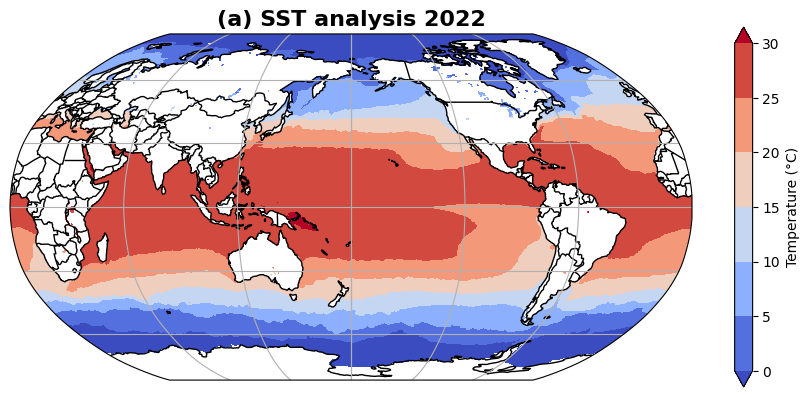

In [ ]:
#Load dataset
ERA5_data = xr.open_dataset(r'//content/drive/My Drive/Ester AIMS/AIMS project/ERA5.nc')
#convert Kelvin to degrees celsius
ERA5_data = ERA5_data['sst'] - 273.15

#group data by year and take their mean
ERA5_avg = ERA5_data.groupby('time.year').mean('time')
#select year
ERA5_2022 = ERA5_avg.sel(year=2022)
# Create a figure with specified map projection
fig = plt.figure(figsize=(11, 8.5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
# Making a filled contour plot
cs = ax.contourf(ERA5_2022['longitude'], ERA5_2022['latitude'], ERA5_2022,
                 transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')
# Add coastlines, and borders
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.gridlines()
#title of the map
ax.set_title('(a) SST analysis 2022', fontsize=16, fontweight='bold')
# Add colorbar
cbar = plt.colorbar(cs, shrink=0.55, label = 'Temperature (°C)')

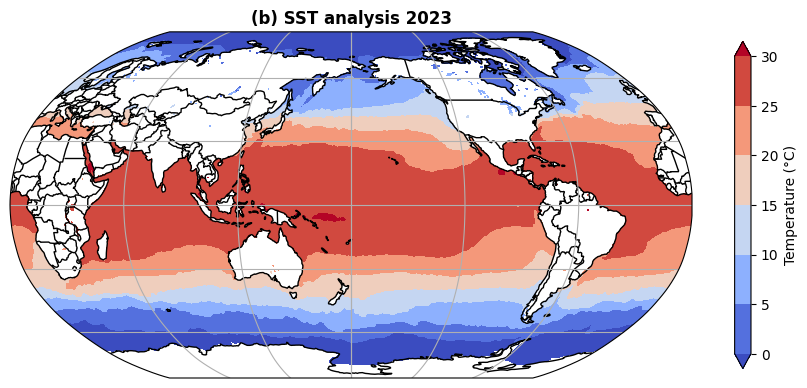

In [ ]:
#Read dataset
ERA5_2023 = xr.open_dataset(r'//content/drive/My Drive/Ester AIMS/AIMS project/ERA5_2023.nc')
#combining
ERA5_2023 = ERA5_2023.sel(expver=1).combine_first(ERA5_2023.sel(expver=5))
#convert Kelvin to degrees celsius
ERA5_2023 = ERA5_2023['sst'] -273.15
#yearly mean for 2023
ERA5_avg_2023 = ERA5_2023.groupby('time.year').mean('time')
ERA5_data_2023 = ERA5_avg_2023.sel(year=2023)
# Create a figure with specified map projection
fig = plt.figure(figsize=(11, 8.5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
data = ERA5_data_2023
# Make a filled contour plot
cs = ax.contourf(ERA5_data_2023['longitude'], ERA5_data_2023['latitude'], data,
                 transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both')
# Add coastlines, borders, ocean, lakes, rivers and gridline
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.gridlines()
#title of the map
ax.set_title('(b) SST analysis 2023', fontsize=12, fontweight='bold')
# Add colorbar
cbar = plt.colorbar(cs, shrink=0.5,label = 'Temperature (°C)')

# **SST difference**

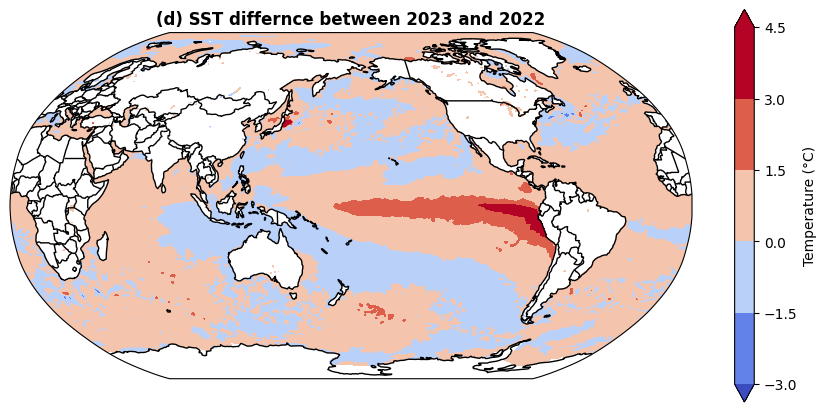

In [ ]:
#compute the difference
anom_22_23 = ERA5_data_2023 - ERA5_2022
# Create a figure with specified map projection
fig = plt.figure(figsize=(11, 8.5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
# Make a filled contour plot
cs = ax.contourf(anom_22_23['longitude'], anom_22_23['latitude'], anom_22_23,
                 transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both',
                 vmin = -3, vmax = 3)
# Add coastlines, border feature
ax.coastlines()
ax.add_feature(cf.BORDERS)

#title of the map
ax.set_title('(d) SST differnce between 2023 and 2022', fontsize=12, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(cs, shrink=0.6, label = 'Temperature (°C)')

In [ ]:
#Grouping data by year
ERA5_avg = ERA5_data.groupby('time.year').mean('time')

In [ ]:
#Grouping data by year
ERA5_avg = ERA5_data.groupby('time.year').mean('time')
#Slicing required years
ERA5_91_20 = ERA5_avg.where((ERA5_avg.year > 1990) & (ERA5_avg.year < 2021), drop=True)
# ERA5_91_20

In [ ]:
#1991 to 2020 mean
ERA5_91_20_avg = ERA5_91_20.mean(dim="year", keep_attrs=True)

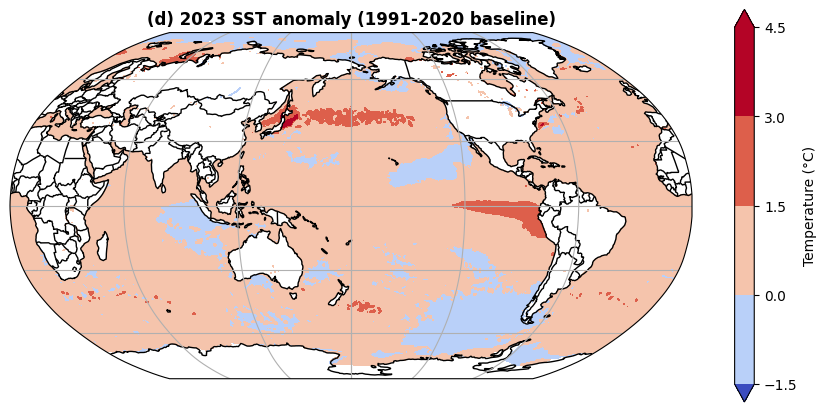

In [ ]:
#calculating anomaly
anom_91_20 = ERA5_data_2023 - ERA5_91_20_avg
# Create a figure with specified map projection
fig = plt.figure(figsize=(11, 8.5))
ax = plt.axes(projection=ccrs.Robinson(central_longitude=180))
# Make a filled contour plot
cs = ax.contourf(anom_91_20['longitude'], anom_91_20['latitude'], anom_91_20,
                 transform=ccrs.PlateCarree(), cmap='coolwarm', extend='both',
                 vmin = -3, vmax = 3)
# Add coastlines, borders, ocean, lakes, rivers and gridline
ax.coastlines()
ax.add_feature(cf.BORDERS)
ax.gridlines()

#title of the map
ax.set_title('(d) 2023 SST anomaly (1991-2020 baseline)', fontsize=12, fontweight='bold')

# Add colorbar
cbar = plt.colorbar(cs, shrink=0.6, label = 'Temperature (°C)')

In [ ]:
ERA5_sst = xr.concat([ERA5_2023, ERA5_data], dim='time')
# ERA5_sst

/usr/local/lib/python3.10/dist-packages/xarray/core/concat.py:532: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  common_dims = tuple(pd.unique([d for v in vars for d in v.dims]))


In [ ]:
# Convert latitude from degrees to radians and the cosine to adjust dataset values
weights = np.cos(np.deg2rad(ERA5_sst.latitude))
weights.name = "weights"
sst_weighted = ERA5_sst.weighted(weights)
#weighted mean
sst_mean = sst_weighted.mean(["longitude", "latitude"])

Text(0.5, 1.0, 'SST Time series over the years')

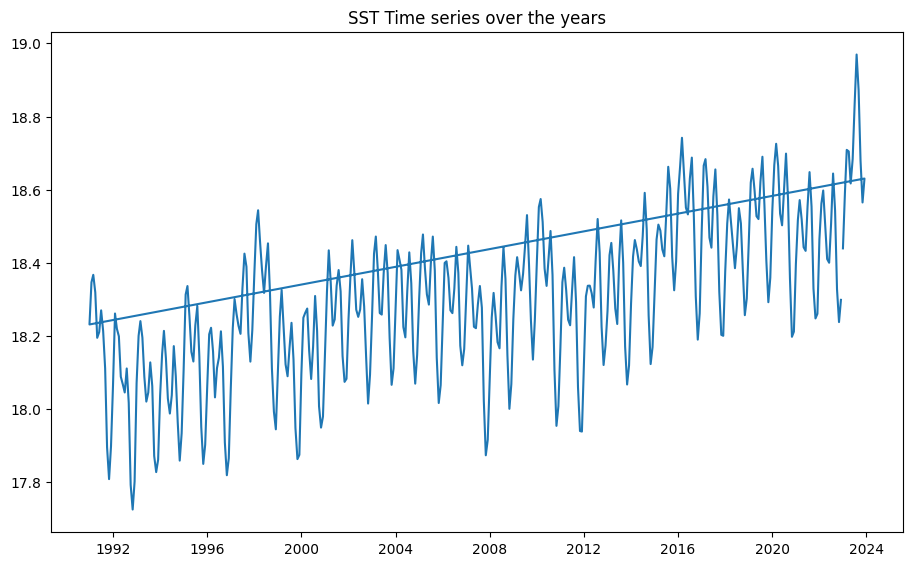

In [ ]:
# Create a figure for the plot
fig, ax = plt.subplots(1, 1, figsize = (11, 6.5))
x = sst_mean['time']
y = sst_mean
plt.plot(x,y)
plt.title('SST Time series over the years')

In [ ]:
# weighted mean and std time series data grouped by years
sst_yearly = sst_mean.groupby('time.year').mean()
std = sst_mean.groupby('time.year').std()

Text(0.5, 1.0, 'Yearly average time series for SST')

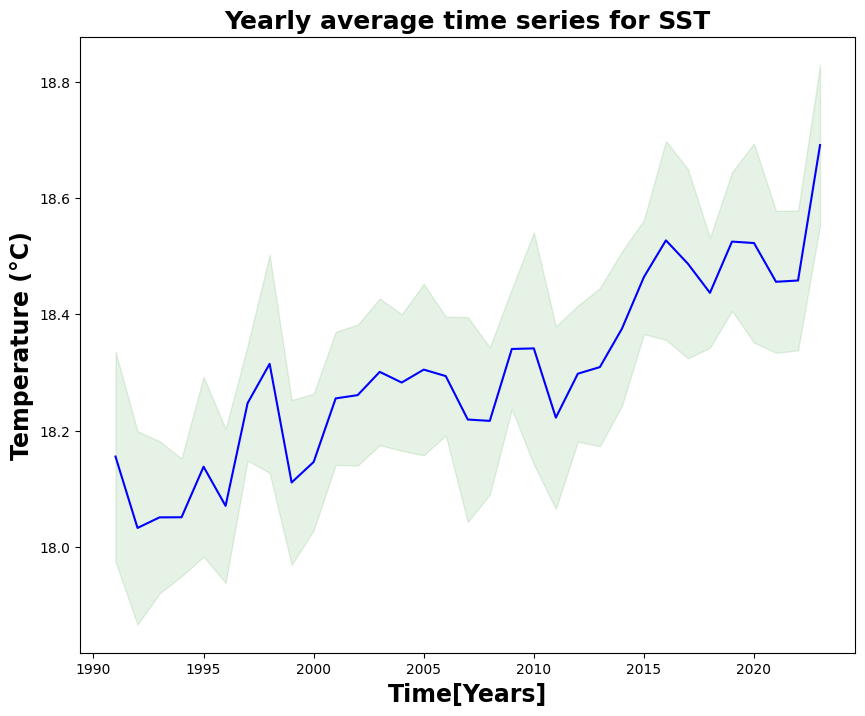

In [ ]:
# Create figure and axis object for the plot
fig, ax = plt.subplots(1, 1, figsize = (10, 8))

# Yearly average for SST time series plot
ax.plot(sst_yearly.year, sst_yearly, color='blue', label='mean')
ax.fill_between(sst_yearly.year, (sst_yearly + std), (sst_yearly - std), alpha=0.1, color='green', label='+/- 1 SD')

# Set the x-axis label and the y-axis label
ax.set_xlabel('Time[Years]', fontweight='bold',  fontsize='17', horizontalalignment='center')
ax.set_ylabel('Temperature (°C)', fontweight='bold', fontsize='17')
plt.title('Yearly average time series for SST', fontweight='bold', fontsize='18')

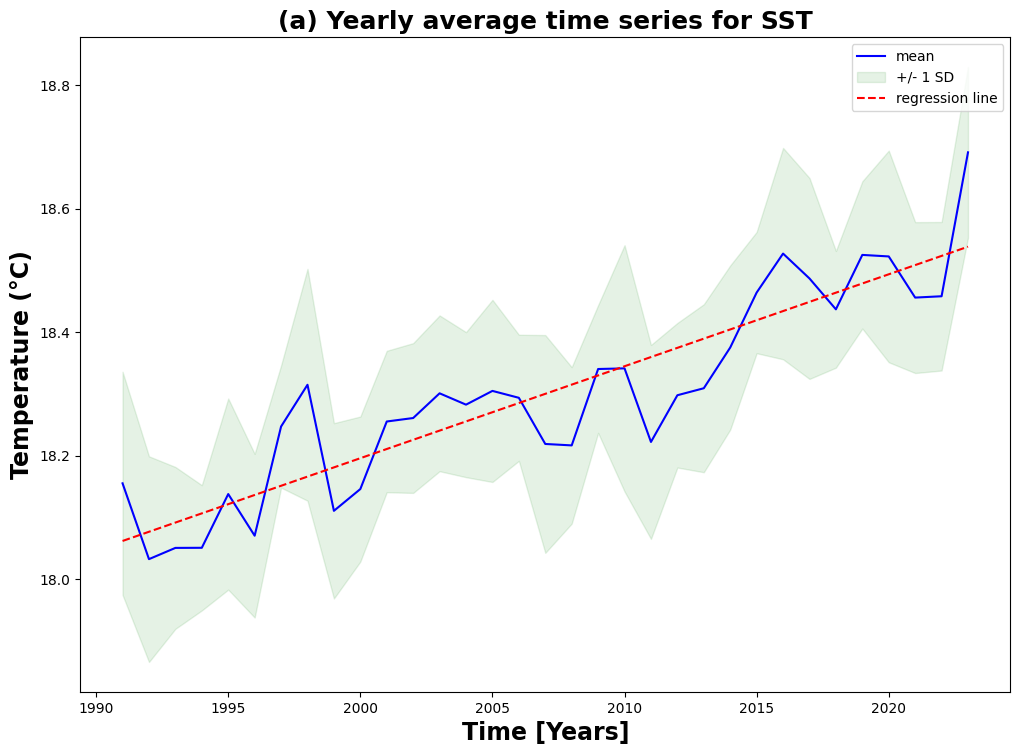

In [ ]:
# Calculate regression line
slope, intercept = np.polyfit(sst_yearly.year, sst_yearly, 1)
regression_line = slope * sst_yearly.year + intercept
# Create the plot
fig, ax = plt.subplots(1, 1, figsize=(12, 8.5))
# Plot the data
ax.plot(sst_yearly.year, sst_yearly, color='blue', label='mean')
ax.fill_between(sst_yearly.year, (sst_yearly + std), (sst_yearly - std), alpha=0.1, color='green', label='+/- 1 SD')
# Plot the regression line
ax.plot(sst_yearly.year, regression_line, color='red', linestyle='--', label='regression line')
# Set labels and title
ax.set_xlabel('Time [Years]', fontweight='bold', fontsize=17, horizontalalignment='center')
ax.set_ylabel('Temperature (°C)', fontweight='bold', fontsize=17)
plt.title('(a) Yearly average time series for SST', fontweight='bold', fontsize='18')
# Add legend
ax.legend()

plt.show()


In [ ]:
# Select data for the year 2023 and 2022
da = ERA5_sst.sel(time='2023')
db = ERA5_sst.sel(time='2022')

In [ ]:
# weights based on latitude for the year 2023 data
weights = np.cos(np.deg2rad(da.latitude))
weights.name = "weights"
sst_weighted = da.weighted(weights)
sst_mean = sst_weighted.mean(["longitude", "latitude"])

# weights based on latitude for the year 2022 data
weights2 = np.cos(np.deg2rad(db.latitude))
weights2.name = "weights"
sst_weighted2 = db.weighted(weights2)
sst_mean2 = sst_weighted2.mean(["longitude", "latitude"])

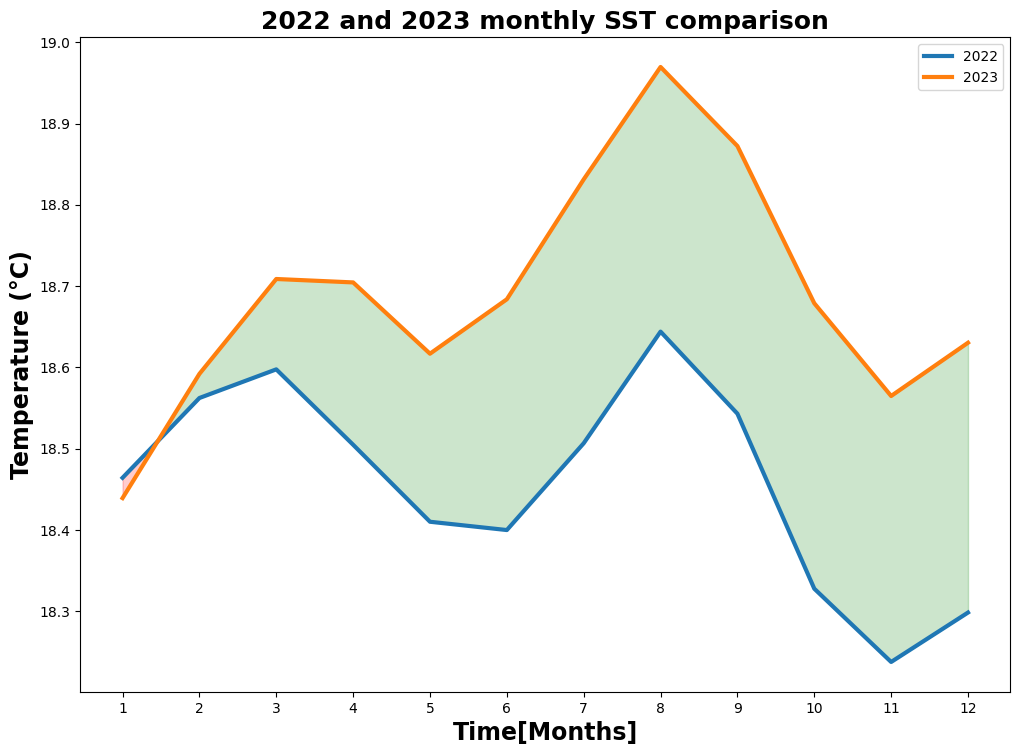

In [ ]:
#mean and stsndard deviation of the monthly SST for 2023
month = sst_mean.groupby('time.month').mean()
std = sst_mean.groupby('time.month').std()

month2 = sst_mean2.groupby('time.month').mean()
std2 = sst_mean2.groupby('time.month').std()

fig = plt.figure(figsize=(12,8.5))

x = month['month']
y = month
x2 = month2['month']
y2 = month2
#Create the plot
plt.plot(x2,y2,linewidth = 3, label = '2022')
plt.plot(x,y, linewidth = 3, label = '2023')
# Fill the area between the mean or minus plus standard deviation
plt.fill_between(x,y,y2, y-y2>0,interpolate=True,color='green', alpha=0.2)
plt.fill_between(x,y,y2, y-y2<0,interpolate=True,color='red', alpha=0.2)
plt.xticks(np.arange(min(x), max(x)+1, 1.0))
plt.xlabel('Time[Months]', fontweight='bold',  fontsize='17', horizontalalignment='center')
plt.ylabel('Temperature (°C)', fontweight='bold', fontsize='17')
plt.title('2022 and 2023 monthly SST comparison', fontweight='bold', fontsize='18')
plt.legend()


# **Bar chart to visualize the time series of anomalies**

In [ ]:
# Select years between 1991 and 2020 (climatology)
sst_subset = sst_yearly.where((sst_yearly.year > 1990) & (sst_yearly.year < 2021), drop=True)
sst_clim = sst_subset.mean()
sst_anom = sst_yearly - sst_clim

In [ ]:
# Convert the xarray dataset to a pandas DataFrame
df = sst_anom.to_dataframe()
# Create a new column to indicate whether the anomaly values are positive or not
df['positive'] = df['sst'] > 0

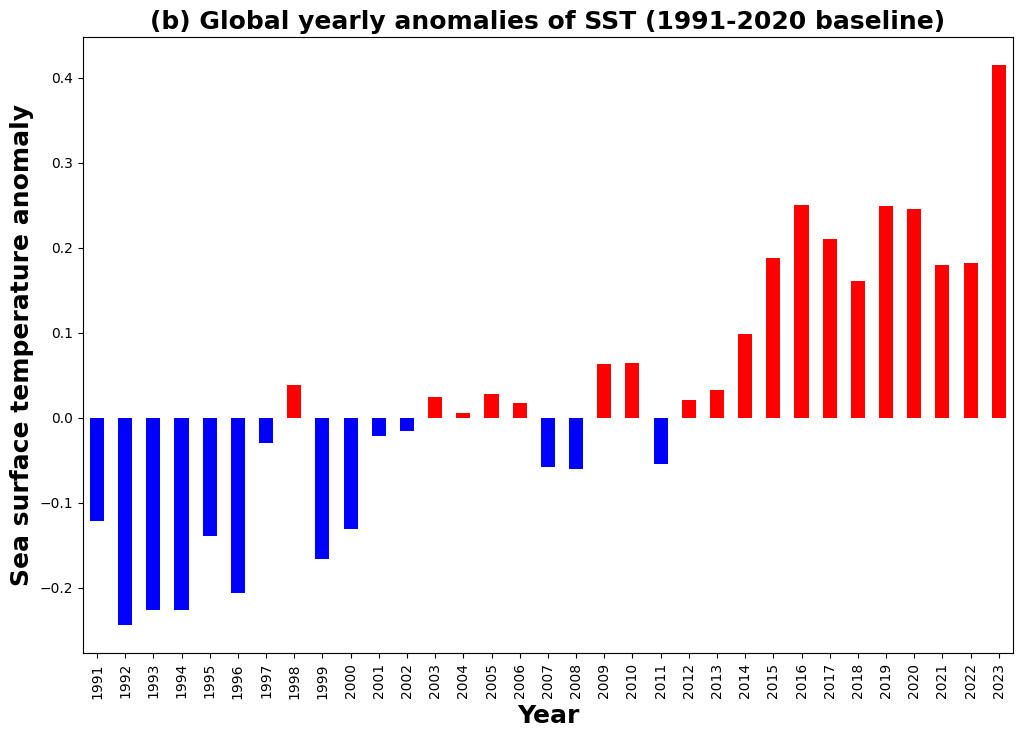

In [ ]:
#Create fugure
figsize = (12, 8)
df['sst'].plot(kind='bar', color=df.positive.map({True: 'red', False: 'blue'}), figsize=figsize)

# Set the labels and title with correct syntax
plt.xlabel('Year', fontsize=18,fontweight='bold')
plt.ylabel('Sea surface temperature anomaly', fontsize=18,fontweight='bold')
plt.title('(b) Global yearly anomalies of SST (1991-2020 baseline)', fontsize=18, fontweight='bold')
# Display the plot
plt.show()
